#CODER HOUSE
##Data Scince 3


###Proyecto Final Redes Neuronales
04/07/2025


##Contexto, introduccion e hipotesis

Contexto

Se simula el contexto de un laboratorio de desarrollo de inteligencia artificual.

Introduccion

Se comienza con un proyecto para desarrollar software, o en lo posible un agente de IA, con asistencia de IA para el control del trafico en general.
Se inicia con el entrenamiento de modelos de redes neuronales, de las mas basicas a las mas complejas, con imagenes reales de diferentes vehiculos que puedan aparecer en la orbita de accion del modelo. Por ejemplo autos, camiones, aviones, pero tambien perros, gatos, ciervos o ranas. El material de entrenamiento deberia ir creciendo para intentar abarcar las muchas multiples situaciones que puedan presentarce en dicho ambiente.
Esta etapa solo esta centrada en el reconocimiento de los objetos.
El corpus, o data set, sera importao utilizando la libreria de Tenser Flow.


Hipotesis


Es posible con el uso de redes neuronales reconocer diferentes objetos que pueden precentarce en las zonas de interez, por ejemplo zonas urbanas o simi urbanas, zonas de campo pero con transito, etc.














##Importado de librerias elementales.

In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


## Carga del Data Set y breve exploracion.

In [19]:
# Cargar dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Mostrar la forma de los datos
print("Forma de los datos de entrenamiento (imágenes):", x_train.shape)
print("Forma de las etiquetas de entrenamiento:", y_train.shape)
print("Forma de los datos de prueba (imágenes):", x_test.shape)
print("Forma de las etiquetas de prueba:", y_test.shape)


Forma de los datos de entrenamiento (imágenes): (50000, 32, 32, 3)
Forma de las etiquetas de entrenamiento: (50000, 1)
Forma de los datos de prueba (imágenes): (10000, 32, 32, 3)
Forma de las etiquetas de prueba: (10000, 1)


## Etiquetado de objetos

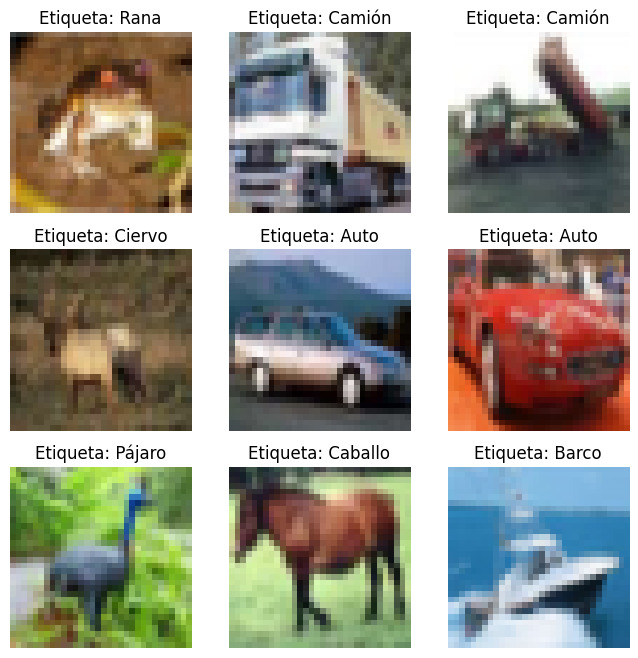

In [20]:
# Mapear etiquetas numéricas a nombres de clases
clases = ['Avión', 'Auto', 'Pájaro', 'Gato', 'Ciervo', 'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Etiqueta: {clases[y_train[i][0]]}")
    plt.axis('off')
plt.show()


| Índice | Clase                    |
| ------ | ------------------------ |
| 0      | avión (`airplane`)       |
| 1      | automóvil (`automobile`) |
| 2      | pájaro (`bird`)          |
| 3      | gato (`cat`)             |
| 4      | ciervo (`deer`)          |
| 5      | perro (`dog`)            |
| 6      | rana (`frog`)            |
| 7      | caballo (`horse`)        |
| 8      | barco (`ship`)           |
| 9      | camión (`truck`)         |


## Preparacion del entorno y entrenamiento del primer modelo

In [21]:
# Normalizar los valores de los píxeles a rango [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Verificamos
print("Valor mínimo de un píxel tras normalizar:", x_train.min())
print("Valor máximo de un píxel tras normalizar:", x_train.max())


Valor mínimo de un píxel tras normalizar: 0.0
Valor máximo de un píxel tras normalizar: 1.0


In [22]:

num_classes = 10  # CIFAR-10 tiene 10 clases

model = Sequential([
        Flatten(input_shape=(32, 32, 3)),                 # Aplanar la imagen 32x32x3 = 3072
        Dense(128, activation='relu'),                    # Capa oculta con 128 neuronas y ReLU
        Dense(num_classes, activation='softmax')])        # Capa de salida con softmax para 10 clases


model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)                           # Se entrena el primer modelo dejando un 10 % de los datos de entrenamiento para hacer la validacion.
                                                                                                 # Este porcentaje de separacion para entrenamiento sera adoptado en todos los modelos como un standar.





Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.2731 - loss: 2.0295 - val_accuracy: 0.3600 - val_loss: 1.7990
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.3752 - loss: 1.7582 - val_accuracy: 0.3650 - val_loss: 1.7826
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3937 - loss: 1.7003 - val_accuracy: 0.3832 - val_loss: 1.7188
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4122 - loss: 1.6565 - val_accuracy: 0.4088 - val_loss: 1.6592
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.4173 - loss: 1.6316 - val_accuracy: 0.4212 - val_loss: 1.6329
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4280 - loss: 1.6100 - val_accuracy: 0.4122 - val_loss: 1.6503
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4397 - loss: 1.5844 - val_accuracy: 0.4334 - val_loss: 1.5931
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4377 - loss: 1

In [24]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

print(classification_report(y_true, y_pred_classes, target_names=clases))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

       Avión       0.41      0.64      0.50      1000
        Auto       0.49      0.63      0.55      1000
      Pájaro       0.34      0.26      0.30      1000
        Gato       0.32      0.19      0.24      1000
      Ciervo       0.41      0.25      0.31      1000
       Perro       0.46      0.25      0.32      1000
        Rana       0.37      0.70      0.48      1000
     Caballo       0.46      0.54      0.50      1000
       Barco       0.61      0.47      0.53      1000
      Camión       0.55      0.45      0.50      1000

    accuracy                           0.44     10000
   macro avg       0.44      0.44      0.42     10000
weighted avg       0.44      0.44      0.42     10000



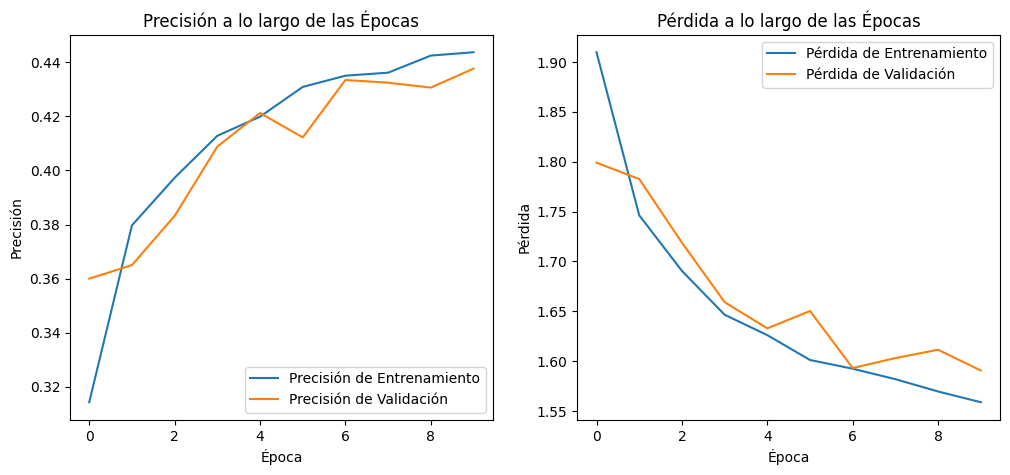

In [25]:
# Graficar la Precisión (Accuracy)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión a lo largo de las Épocas')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Graficar la Pérdida (Loss)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida a lo largo de las Épocas')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()



In [26]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4438 - loss: 1.5606 - val_accuracy: 0.4380 - val_loss: 1.5866
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4515 - loss: 1.5361 - val_accuracy: 0.4428 - val_loss: 1.5846
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4569 - loss: 1.5356 - val_accuracy: 0.4430 - val_loss: 1.5751
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4639 - loss: 1.5172 - val_accuracy: 0.4496 - val_loss: 1.5414
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4588 - loss: 1.5150 - val_accuracy: 0.4264 - val_loss: 1.6093
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4596 - loss: 1.5140 - val_accuracy: 0.4522 - val_loss: 1.5457
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4624 - loss: 1.5064 - val_accuracy: 0.4294 - val_loss: 1.5906
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4682 - loss: 1

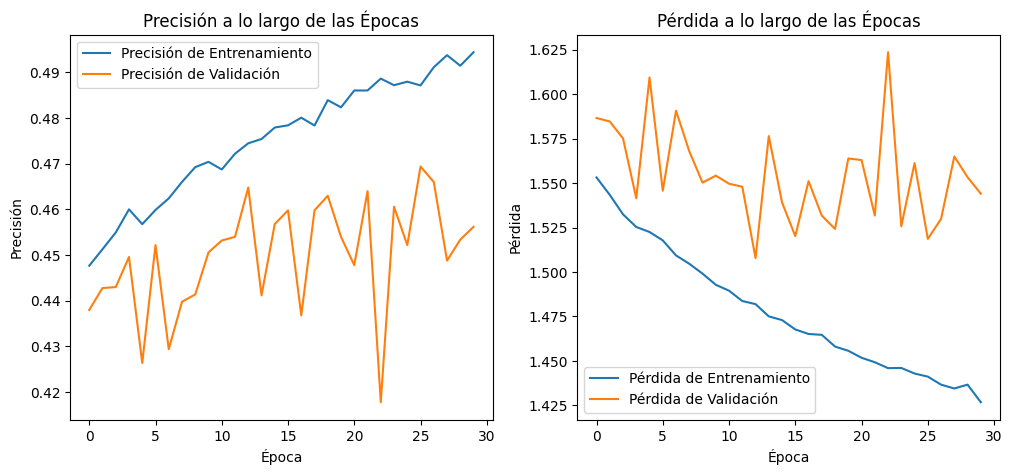

In [27]:
# Graficar la Precisión (Accuracy)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión a lo largo de las Épocas')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Graficar la Pérdida (Loss)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida a lo largo de las Épocas')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


In [28]:

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

print(classification_report(y_true, y_pred_classes, target_names=clases))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

       Avión       0.61      0.36      0.45      1000
        Auto       0.58      0.55      0.57      1000
      Pájaro       0.33      0.37      0.35      1000
        Gato       0.34      0.21      0.26      1000
      Ciervo       0.38      0.39      0.39      1000
       Perro       0.46      0.27      0.34      1000
        Rana       0.45      0.57      0.50      1000
     Caballo       0.44      0.59      0.50      1000
       Barco       0.48      0.73      0.58      1000
      Camión       0.51      0.53      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.45     10000
weighted avg       0.46      0.46      0.45     10000



In [29]:
# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.4561 - loss: 1.5492

Precisión en el conjunto de prueba: 0.4561
Pérdida en el conjunto de prueba: 1.5492


##Modelo mejoradado usando una red convolucional

In [30]:
from tensorflow.keras import layers, models

model_2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
print("Iniciando el entrenamiento...")
history_2 = model_2.fit(x_train, y_train, epochs=15, validation_split=0.1)
print("¡Entrenamiento finalizado!")


Iniciando el entrenamiento...
Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 46ms/step - accuracy: 0.3462 - loss: 1.7665 - val_accuracy: 0.5350 - val_loss: 1.3066
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 69s 49ms/step - accuracy: 0.5635 - loss: 1.2236 - val_accuracy: 0.6246 - val_loss: 1.0610
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.6350 - loss: 1.0375 - val_accuracy: 0.6600 - val_loss: 0.9888
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.6748 - loss: 0.9323 - val_accuracy: 0.6800 - val_loss: 0.9245
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.7036 - loss: 0.8446 - val_accuracy: 0.6964 - val_loss: 0.8794
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 64s 46ms/step - accuracy: 0.7266 - loss: 0.7834 - val_accuracy: 0.6802 - val_loss: 0.9372
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7458 - loss: 0.7274 - val_accuracy: 0.7026 - val_loss: 0.8744
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 

In [32]:
y_pred = model_2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

print(classification_report(y_true, y_pred_classes, target_names=clases))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

       Avión       0.75      0.73      0.74      1000
        Auto       0.73      0.87      0.80      1000
      Pájaro       0.68      0.48      0.56      1000
        Gato       0.55      0.48      0.51      1000
      Ciervo       0.65      0.70      0.67      1000
       Perro       0.59      0.63      0.61      1000
        Rana       0.66      0.87      0.75      1000
     Caballo       0.73      0.76      0.75      1000
       Barco       0.81      0.80      0.80      1000
      Camión       0.88      0.65      0.74      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [33]:
# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model_2.evaluate(x_test, y_test, verbose=2)

print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")

313/313 - 4s - 14ms/step - accuracy: 0.6980 - loss: 1.0616

Precisión en el conjunto de prueba: 0.6980
Pérdida en el conjunto de prueba: 1.0616


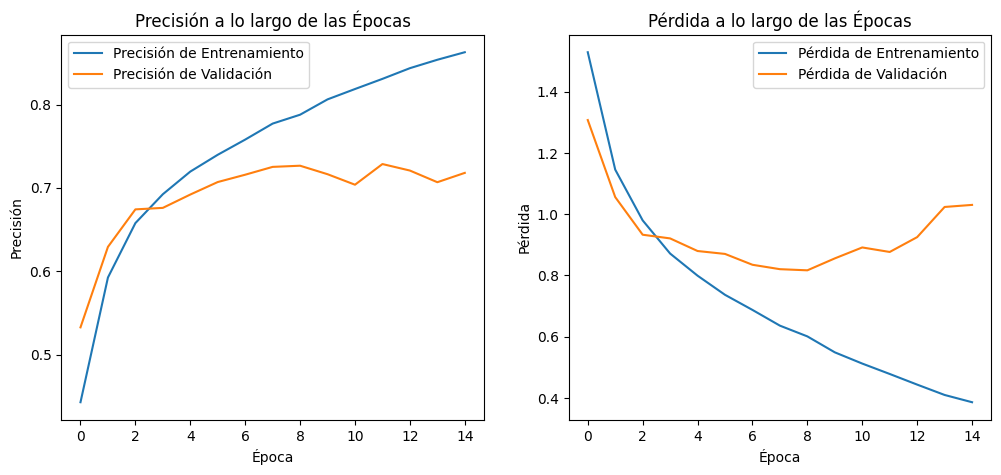

In [ ]:
# Graficar la Precisión (Accuracy)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.plot(history_2.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history_2.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión a lo largo de las Épocas')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Graficar la Pérdida (Loss)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.plot(history_2.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_2.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida a lo largo de las Épocas')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


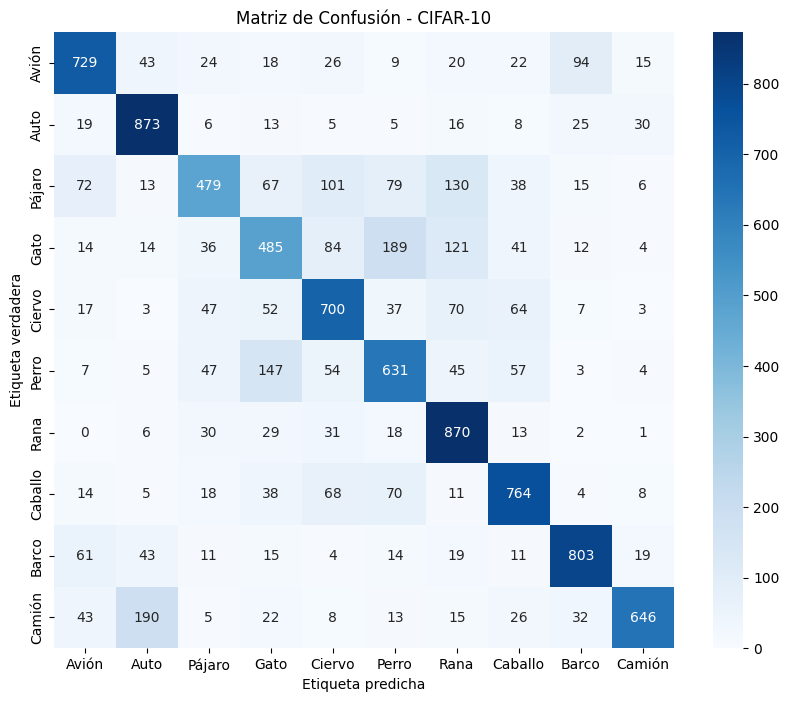

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Calcular matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)



plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clases, yticklabels=clases)
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión - CIFAR-10')
plt.show()


##Mejora del modelo convolucional agregando una capa de salida densa de salia extra con 128 neuronas.


In [35]:
from tensorflow import keras
from tensorflow.keras import layers

# Modelo CNN más profundo
model_3 = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

# Compilación del modelo
model_3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamiento
print("\nEntrenando el segundo modelo (más profundo)...")
history_3 = model_3.fit(x_train, y_train,
                        epochs=15,
                        validation_split=0.1)

# Evaluación final
print("\nEvaluando el segundo modelo...")
test_loss_3, test_acc_3 = model_3.evaluate(x_test, y_test, verbose=2)
print(f"\nPrecisión del modelo 3 en prueba: {test_acc_3:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Entrenando el segundo modelo (más profundo)...
Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 53ms/step - accuracy: 0.3392 - loss: 1.7648 - val_accuracy: 0.5462 - val_loss: 1.2708
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.5666 - loss: 1.2098 - val_accuracy: 0.6224 - val_loss: 1.0548
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 68s 48ms/step - accuracy: 0.6360 - loss: 1.0282 - val_accuracy: 0.6660 - val_loss: 0.9421
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.6918 - loss: 0.8862 - val_accuracy: 0.6746 - val_loss: 0.9089
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7203 - loss: 0.7996 - val_accuracy: 0.7098 - val_loss: 0.8446
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 48ms/step - accuracy: 0.7446 - loss: 0.7329 - val_accuracy: 0.6610 - val_loss: 1.0332
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 48ms/step - accuracy: 0.7681 - loss: 0.6515 - val_accuracy: 0.7134 - val_loss: 0.8531
Epoch 8/15
1407/1407 ━━━━━━━

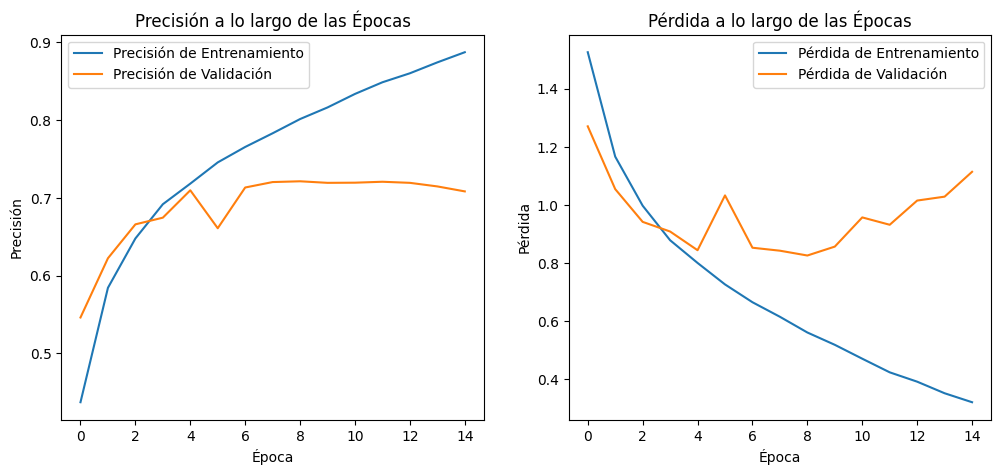

In [38]:
# Graficar la Precisión (Accuracy)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.plot(history_3.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history_3.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión a lo largo de las Épocas')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Graficar la Pérdida (Loss)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.plot(history_3.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_3.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida a lo largo de las Épocas')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [37]:
# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model_3.evaluate(x_test, y_test, verbose=2)

print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")

313/313 - 5s - 17ms/step - accuracy: 0.7001 - loss: 1.1569

Precisión en el conjunto de prueba: 0.7001
Pérdida en el conjunto de prueba: 1.1569


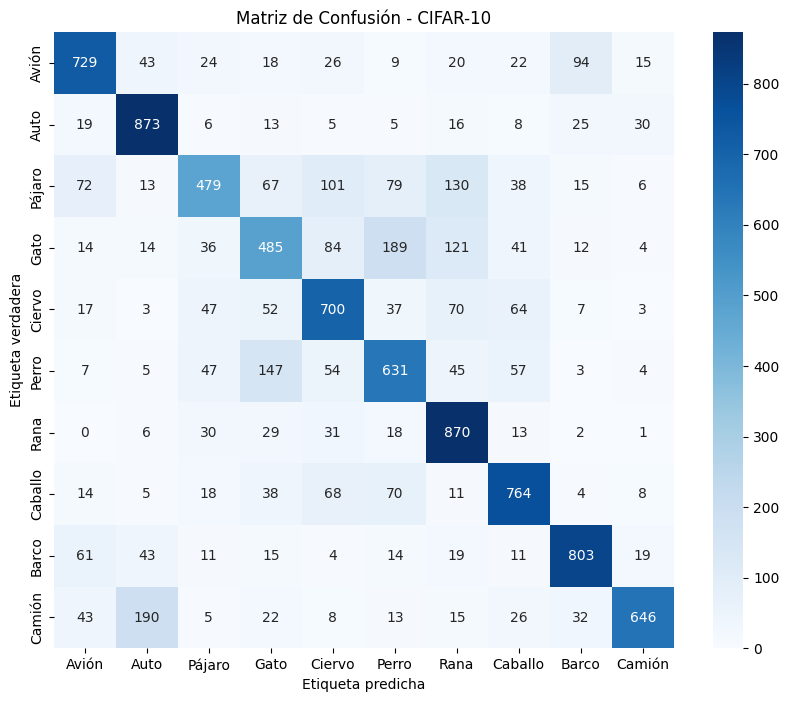

In [40]:
# Calcular matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)



plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clases, yticklabels=clases)
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión - CIFAR-10')
plt.show()

In [42]:
# Modelo CNN más profundo y Dropout


model_3 = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.33),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

# Compilación del modelo
model_3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamiento
print("\nEntrenando el segundo modelo (más profundo)...")
history_3 = model_3.fit(x_train, y_train,
                        epochs=15,
                        validation_split=0.1)

# Evaluación final
print("\nEvaluando el segundo modelo...")
test_loss_3, test_acc_3 = model_3.evaluate(x_test, y_test, verbose=2)
print(f"\nPrecisión del modelo 3 en prueba: {test_acc_3:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Entrenando el segundo modelo (más profundo)...
Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 50ms/step - accuracy: 0.3046 - loss: 1.8589 - val_accuracy: 0.5154 - val_loss: 1.3176
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.5383 - loss: 1.2903 - val_accuracy: 0.6114 - val_loss: 1.0954
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.6020 - loss: 1.1268 - val_accuracy: 0.6524 - val_loss: 0.9775
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.6361 - loss: 1.0273 - val_accuracy: 0.6732 - val_loss: 0.9348
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.6720 - loss: 0.9327 - val_accuracy: 0.6836 - val_loss: 0.9173
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.6934 - loss: 0.8665 - val_accuracy: 0.6990 - val_loss: 0.8734
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.7153 - loss: 0.8102 - val_accuracy: 0.7096 - val_loss: 0.8382
Epoch 8/15
1407/1407 ━━━━━━━

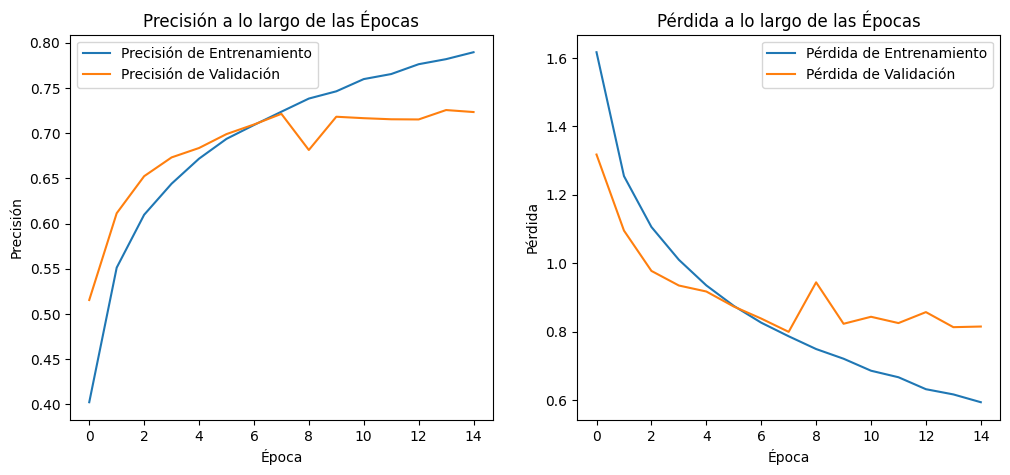

In [43]:
# Graficar la Precisión (Accuracy)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.plot(history_3.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history_3.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión a lo largo de las Épocas')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Graficar la Pérdida (Loss)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.plot(history_3.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_3.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida a lo largo de las Épocas')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


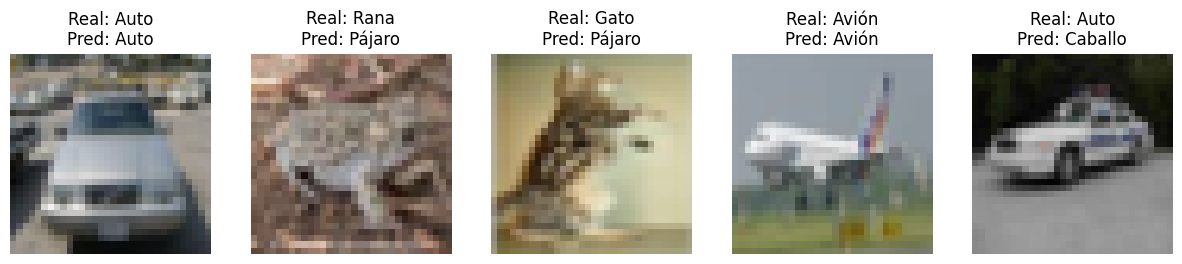

In [45]:


# Elegimos algunas imágenes aleatorias del set de test
num_imagenes = 5
indices = np.random.choice(len(x_test), num_imagenes, replace=False)
imagenes = x_test[indices]
etiquetas_true = y_test[indices].flatten()

# Predecimos las clases
predicciones_prob = model.predict(imagenes)
predicciones = np.argmax(predicciones_prob, axis=1)

clases = ['Avión', 'Auto', 'Pájaro', 'Gato', 'Ciervo', 'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

# Visualizamos las imágenes con etiquetas reales y predichas
plt.figure(figsize=(15, 5))
for i in range(num_imagenes):
    plt.subplot(1, num_imagenes, i+1)
    plt.imshow(imagenes[i])
    plt.title(f"Real: {clases[etiquetas_true[i]]}\nPred: {clases[predicciones[i]]}")
    plt.axis('off')
plt.show()



##Evaluacion y conclucion con repecto a los diferentes modelos utilizados


Llendo desde el mas basico al mas complejo se evidencia una mejoria. Siendo mas significativa en el salto a las redes convolucionales para luego ser minima pero tal vez siginificativa en las diferentes versiones de las mismas.
Las epocas que figuran en el proyecto no fueron todas las provadas, solo quedaron las que a mi entender fueron mas significativas siendo que en apariencia a partir de las epoca numero 8 los diferentes modelos no suman gran mejoria.
El "drop out" que se implementa en el ultimo modelo, da una muy pequeña mejoria en cuanto a la presicion con respecto a los datos de testeo pero tambien da una minina baja en el acuracy en los datos de entrenamiento. Siendo esto en mi opinion una cuestion postiva ya deberia estar demostrando que el modelo no tiene overfiting.

##CONCLUCION Y CONSIDERACIONES FINALES



***Conclusion***

 Si es posible reconocer diferentes objetos y diferenciarlos con cierta eficacia. Por ahora la mejor puntuacion en cuanto a la presicion es de 0.7186, lo cual en mi opinion es bueno para tratarce de una primera aproximacion a la problematica.

***Consideraciones finales***

 Se deberia trabajar en analizar las diferentes clases y el porcentaje de presicion en cada una de ellas y desde ese punto seguir afinanado el modelo. Se deberian incluir mas cantidad de imagenes y seria bueno tambien utilizar algoritmos de generacion de imagines para nutrir todavia mas el corpus del proyecto.